In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight, resample
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input,  Softmax, Add,  AveragePooling1D, ZeroPadding1D,Activation
from keras import backend as K
from keras.models import Model
from keras.initializers import glorot_uniform

In [2]:
train_df=pd.read_csv('ECG Heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('ECG Heartbeat/mitbih_test.csv',header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.shape

(87554, 188)

In [5]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_df.shape

(21892, 188)

In [7]:
train_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [8]:
print(train_df[187].value_counts())

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


<AxesSubplot: xlabel='187', ylabel='count'>

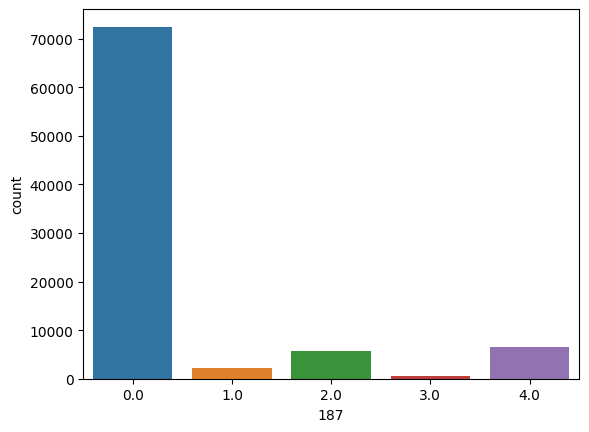

In [9]:
sns.countplot(x=187, data = train_df) 

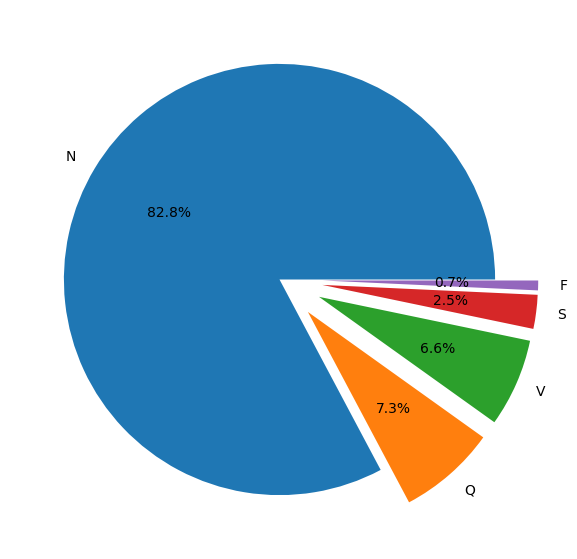

In [10]:
plt.figure(figsize=(7,7))
explode = (0, 0.2,0.2,0.2,0.2)
plt.pie(train_df[187].value_counts(), labels=['N','Q','V','S','F'], autopct='%1.1f%%', explode=explode)
plt.show()

In [11]:
x = train_df.drop(187,axis=1)
y = train_df[187].astype('int64')
print(x.shape)
print(y.shape)

x_test = test_df.drop(187,axis=1)
y_test = test_df[187].astype('int64')
print(x_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [12]:
x_train,x_val,y_train,y_val = train_test_split(x,y.values,random_state=42,stratify=y.values,shuffle=True,train_size=0.75)

In [13]:
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

The shape of training data :  (65665, 187) (65665,)
The shape of validation data :  (21889, 187) (21889,)


In [14]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [15]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
cnn = Sequential()
cnn.add(Conv1D(128,3,input_shape=(x_train.shape[1],1), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(5, activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 128)          512       
                                                                 
 batch_normalization (BatchN  (None, 185, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                        

In [18]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='best_weights.h5', monitor='val_loss', save_best_only=True)]

In [19]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history=cnn.fit(x_train, y_train,epochs=20, callbacks=callbacks, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/20
2053/2053 [==============================] - 158s 72ms/step - loss: 0.1959 - accuracy: 0.9476 - val_loss: 0.1068 - val_accuracy: 0.9719
Epoch 2/20
2053/2053 [==============================] - 140s 68ms/step - loss: 0.1097 - accuracy: 0.9705 - val_loss: 0.0943 - val_accuracy: 0.9757
Epoch 3/20
2053/2053 [==============================] - 195s 95ms/step - loss: 0.0914 - accuracy: 0.9745 - val_loss: 0.0856 - val_accuracy: 0.9766
Epoch 4/20
2053/2053 [==============================] - 226s 110ms/step - loss: 0.0833 - accuracy: 0.9769 - val_loss: 0.0826 - val_accuracy: 0.9774
Epoch 5/20
2053/2053 [==============================] - 192s 93ms/step - loss: 0.0690 - accuracy: 0.9806 - val_loss: 0.0739 - val_accuracy: 0.9794
Epoch 6/20
2053/2053 [==============================] - 143s 70ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.0627 - val_accuracy: 0.9827
Epoch 7/20
2053/2053 [==============================] - 175s 85ms/step - loss: 0.0575 - accuracy: 0.9832 - val_loss: 

In [21]:
from keras.models import load_model
best_model=load_model('best_weights.h5')
results = best_model.evaluate(x_test,y_test)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

685/685 [==============================] - 10s 10ms/step - loss: 0.0680 - accuracy: 0.9847
Test Loss: 0.06805
Test Accuracy: 98.47%


<AxesSubplot: >

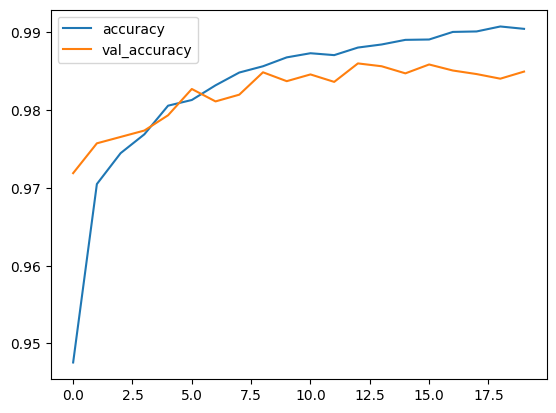

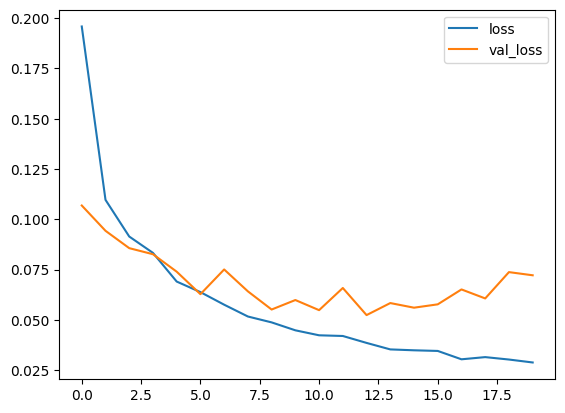

In [22]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [26]:
x_train = np.expand_dims(x_train, 2)
x_val = np.expand_dims(x_val, 2)
x_test = np.expand_dims(x_test, 2)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)
print("The shape of testing data : ",x_test.shape,y_test.shape)

The shape of training data :  (65665, 187, 1) (65665, 5)
The shape of validation data :  (21889, 187, 1) (21889, 5)
The shape of testing data :  (21892, 187, 1) (21892, 5)


In [27]:
'''n_obs, feature, depth = x_train.shape
batch_size = 512
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X'''

In [28]:
'''def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X'''

In [29]:
'''def ResNet(input_shape=(feature,depth)):

    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)

    X = Conv1D(64, 7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides= 2)(X)

    X = convolutional_block(X, f=3, filters=[128, 128, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='b')
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size= 2, padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet')

    return model'''

In [30]:
#base_model = ResNet(input_shape=(feature,depth))

In [31]:
'''headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(5,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)'''

In [32]:
#model = Model(inputs=base_model.input, outputs=headModel)

In [33]:
#model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 193, 1)      0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv1D)                 (None, 94, 64)       512         ['zero_padding1d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 94, 64)       256         ['conv1[0][0]']                  
                                                                                              

                                                                                                  
 bn2c_branch2c (BatchNormalizat  (None, 46, 256)     1024        ['res2c_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_2 (Add)                    (None, 46, 256)      0           ['bn2c_branch2c[0][0]',          
                                                                  'activation_6[0][0]']           
                                                                                                  
 activation_9 (Activation)      (None, 46, 256)      0           ['add_2[0][0]']                  
                                                                                                  
 res3a_branch2a (Conv1D)        (None, 23, 128)      32896       ['activation_9[0][0]']           
          

                                                                                                  
 activation_18 (Activation)     (None, 23, 512)      0           ['add_5[0][0]']                  
                                                                                                  
 res3d_branch2a (Conv1D)        (None, 23, 128)      65664       ['activation_18[0][0]']          
                                                                                                  
 bn3d_branch2a (BatchNormalizat  (None, 23, 128)     512         ['res3d_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_19 (Activation)     (None, 23, 128)      0           ['bn3d_branch2a[0][0]']          
                                                                                                  
 res3d_bra

 ion)                                                                                             
                                                                                                  
 activation_28 (Activation)     (None, 12, 256)      0           ['bn4c_branch2a[0][0]']          
                                                                                                  
 res4c_branch2b (Conv1D)        (None, 12, 256)      196864      ['activation_28[0][0]']          
                                                                                                  
 bn4c_branch2b (BatchNormalizat  (None, 12, 256)     1024        ['res4c_branch2b[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_29 (Activation)     (None, 12, 256)      0           ['bn4c_branch2b[0][0]']          
          

 res4f_branch2c (Conv1D)        (None, 12, 1024)     263168      ['activation_38[0][0]']          
                                                                                                  
 bn4f_branch2c (BatchNormalizat  (None, 12, 1024)    4096        ['res4f_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_12 (Add)                   (None, 12, 1024)     0           ['bn4f_branch2c[0][0]',          
                                                                  'activation_36[0][0]']          
                                                                                                  
 activation_39 (Activation)     (None, 12, 1024)     0           ['add_12[0][0]']                 
                                                                                                  
 res5a_bra

                                                                  'activation_45[0][0]']          
                                                                                                  
 activation_48 (Activation)     (None, 6, 2048)      0           ['add_15[0][0]']                 
                                                                                                  
 average_pooling1d (AveragePool  (None, 3, 2048)     0           ['activation_48[0][0]']          
 ing1D)                                                                                           
                                                                                                  
 flatten_1 (Flatten)            (None, 6144)         0           ['average_pooling1d[0][0]']      
                                                                                                  
 fc1 (Dense)                    (None, 256)          1573120     ['flatten_1[0][0]']              
          

In [34]:
'''model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['AUC']
                )
model.save('resnet_model.h5')'''

In [35]:
'''import keras
h = model.fit(
      x_train,y_train,validation_data=(x_val,y_val),
                              epochs=20,batch_size=batch_size,
                              callbacks = [
                                  keras.callbacks.EarlyStopping(monitor='val_auc',patience=5,mode='auto'),
                                  keras.callbacks.ModelCheckpoint('resnet_model.h5',
                                  save_best_only = True,save_weights_only=False,
                                  monitor='val_auc')],
                                verbose=1)'''

Epoch 1/20


KeyboardInterrupt: 

In [49]:
def create_vgg16_model():
    model = Sequential([
    # 1st Conv Block
        Conv1D (filters =64, kernel_size =3, padding ='same',input_shape=(x_train.shape[1],1), activation='relu'),
        Conv1D (filters =64, kernel_size =3, padding ='same', activation='relu'),
        MaxPooling1D(pool_size =2, strides =2, padding ='same'),
    
    # 2nd Conv Block
        Conv1D (filters =128, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =128, kernel_size =3, padding ='same', activation='relu'),
        MaxPooling1D(pool_size =2, strides =2, padding ='same'),
    
    # 3rd Conv block  
        Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu'),
        MaxPooling1D(pool_size =2, strides =2, padding ='same'),
    
    # 4th Conv block
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        MaxPooling1D(pool_size =2, strides =2, padding ='same'),

    # 5th Conv block
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu'),
        MaxPooling1D(pool_size =2, strides =2, padding ='same'),
    
    # Fully connected layers  
        Flatten(),
        Dense(units = 4096, activation ='relu'),
        Dense(units = 4096, activation ='relu'), 
        Dense(units = 5, activation ='softmax')
    ])
    
    return model

vgg16_model = create_vgg16_model()
vgg16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 187, 64)           256       
                                                                 
 conv1d_27 (Conv1D)          (None, 187, 64)           12352     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_28 (Conv1D)          (None, 94, 128)           24704     
                                                                 
 conv1d_29 (Conv1D)          (None, 94, 128)           49280     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 47, 128)          0         
 g1D)                                                 

In [50]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
vgg16_history = vgg16_model.fit(x=x_train,y= y_train, epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
2053/2053 [==============================] - 3702s 2s/step - loss: 0.0923 - accuracy: 0.9290 - val_loss: 0.0652 - val_accuracy: 0.9464
Epoch 2/20
  13/2053 [..............................] - ETA: 59:55 - loss: 0.0738 - accuracy: 0.9447  

KeyboardInterrupt: 